In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nycDF = pd.read_csv('nyc_taxi_trip_duration.csv')
nycDF.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
nycDF.shape

(729322, 11)

In [4]:
nycDF.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

We have 11 features including the target variable and 729322 observations.

In [5]:
nycDF.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [6]:
nycDF['vendor_id'].value_counts(normalize = True)

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

In [7]:
nycDF.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

So, there are 2 categories of Vendor and there is no missing values and there are around 54% observation for vendor 2
and 46% observation from vendor 1

In [8]:
nycDF.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
nycDF.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Some of the observations are

* The max trip_duration looks way too much, so it could be an outlier
* the max passenger_count might also be an outlier, we would like to study the distribution of passenger_count
* vebdor_id is actually a categorical variable

In [10]:
nycDF['passenger_count'].value_counts(normalize = True)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
9    0.000001
7    0.000001
Name: passenger_count, dtype: float64

In [11]:
nycDF[nycDF['trip_duration'] == 1939736]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736


So, almost 71% 1 passenger has traveled and 14% 2 passenger traveled. Rest are very negligible.

In [12]:
nycDF['store_and_fwd_flag'].value_counts(normalize = True)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

So, almost 99.4% journeys are not stored, meaning most of the time the cabs were in the the network coverage

In [13]:
import math as m

def computeDistance(pickLong,pickLat,dropLong,dropLat):
    earthRad  = 6371
    pickLong  = pickLong*m.pi/180
    pickLat   = pickLat*m.pi/180
    dropLong  = dropLong*m.pi/180
    dropLat   = dropLat*m.pi/180
    
    deltaLat  = dropLat - pickLat
    deltaLong = dropLong - pickLong
    
    a = m.sin(deltaLat/2)**2 + m.cos(pickLat)*m.cos(dropLat)*m.sin(deltaLong/2)**2
    c = 2*m.atan2(m.sqrt(a),m.sqrt(1 - a))
    d = earthRad * c
    
    return round(d,2)

In [14]:
# adding tripDistance as a new field in the dataset
nycDF['trip_distance'] = nycDF.apply(lambda x: computeDistance(x['pickup_longitude'], x['pickup_latitude'], 
                                                              x['dropoff_longitude'], x['dropoff_latitude']), axis = 1)

In [15]:
nycDF.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.20
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.13
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.25
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.36
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.33


In [16]:
# return speed in metre per second
def calculateSpeed(dist, dur):
    return round(dist*1000/dur, 2)

In [17]:
nycDF['avg_speed'] = nycDF.apply(lambda x: calculateSpeed(x['trip_distance'], x['trip_duration']), axis = 1)

In [18]:
# removing those observation where avg_speed = 0
nycDF = nycDF[nycDF['avg_speed'] > 0].copy()

In [19]:
nycDF_1 = nycDF[nycDF['vendor_id'] == 1]
nycDF_2 = nycDF[nycDF['vendor_id'] == 2]

In [20]:
req_col = ['pickup_datetime', 'avg_speed','trip_duration','trip_distance', 'passenger_count']
nycTaxi_1 = nycDF_1[req_col].copy()
nycTaxi_2 = nycDF_2[req_col].copy()

In [21]:
nycTaxi_1.head()

,pickup_datetime,avg_speed,trip_duration,trip_distance,passenger_count
1,2016-03-11 23:35:37,3.75,1100,4.13,2
4,2016-02-17 06:42:23,5.11,848,4.33,1
6,2016-04-20 20:30:14,2.87,397,1.14,1
9,2016-04-10 22:01:41,4.30,1429,6.14,1
10,2016-01-17 19:40:26,3.30,527,1.74,1


#### Separating the Date and the Time from the pickup and dropoff datetime

In [22]:
import dateutil.parser

In [23]:
def getDate(timestamp):
    return str(dateutil.parser.parse(str(timestamp)).date())

In [24]:
def getTime(timestamp):
    return str(dateutil.parser.parse(str(timestamp)).time())

In [25]:
nycTaxi_1['pickup_date'] = nycTaxi_1.apply(lambda x:getDate(x['pickup_datetime']), axis = 1)

In [26]:
nycTaxi_1['pickup_time'] = nycTaxi_1.apply(lambda x:getTime(x['pickup_datetime']), axis = 1)

In [27]:
nycTaxi_2['pickup_date'] = nycTaxi_2.apply(lambda x:getDate(x['pickup_datetime']), axis = 1)

In [28]:
nycTaxi_2['pickup_time'] = nycTaxi_2.apply(lambda x:getTime(x['pickup_datetime']), axis = 1)

In [29]:
nycTaxi_2.head()

,pickup_datetime,avg_speed,trip_duration,trip_distance,passenger_count,pickup_date,pickup_time
0,2016-02-29 16:40:21,3.00,400,1.20,1,2016-02-29,16:40:21
2,2016-02-21 17:59:33,4.43,1635,7.25,2,2016-02-21,17:59:33
3,2016-01-05 09:44:31,2.07,1141,2.36,6,2016-01-05,09:44:31
5,2016-02-14 18:31:42,2.14,1455,3.12,2,2016-02-14,18:31:42
7,2016-06-19 16:48:14,7.05,1101,7.76,1,2016-06-19,16:48:14


In [30]:
nycTaxi_2.columns

Index(['pickup_datetime', 'avg_speed', 'trip_duration', 'trip_distance',
       'passenger_count', 'pickup_date', 'pickup_time'],
      dtype='object')

In [31]:
req_col = ['avg_speed', 'trip_duration', 'trip_distance', 'pickup_date', 'pickup_time', 'passenger_count']
nycTaxi_1 = nycTaxi_1[req_col].copy()
nycTaxi_2 = nycTaxi_2[req_col].copy()

In [32]:
nycTaxi_1.head()

,avg_speed,trip_duration,trip_distance,pickup_date,pickup_time,passenger_count
1,3.75,1100,4.13,2016-03-11,23:35:37,2
4,5.11,848,4.33,2016-02-17,06:42:23,1
6,2.87,397,1.14,2016-04-20,20:30:14,1
9,4.30,1429,6.14,2016-04-10,22:01:41,1
10,3.30,527,1.74,2016-01-17,19:40:26,1


In [33]:
print('*************************** VENDOR 1 **********************************')
print(nycTaxi_1.describe())
print('*************************** VENDOR 2 **********************************')
print(nycTaxi_2.describe())

*************************** VENDOR 1 **********************************
           avg_speed  trip_duration  trip_distance  passenger_count
count  337087.000000   3.370870e+05  337087.000000    337087.000000
mean        4.021752   8.401637e+02       3.428470         1.258764
std         4.093989   3.403949e+03       4.722343         0.612081
min         0.010000   1.000000e+00       0.010000         0.000000
25%         2.550000   3.970000e+02       1.240000         1.000000
50%         3.560000   6.610000e+02       2.100000         1.000000
75%         4.960000   1.070000e+03       3.860000         1.000000
max      1566.810000   1.939736e+06    1240.910000         6.000000
*************************** VENDOR 2 **********************************
           avg_speed  trip_duration  trip_distance  passenger_count
count  388270.000000  388270.000000  388270.000000    388270.000000
mean        4.032745    1049.408801       3.487276         2.012677
std         2.711711    4183.439348     

In [34]:
print('------------ Passenger Count for vendor 1 --------------------')
print(nycTaxi_1['passenger_count'].value_counts(normalize = True))
print()
print('------------ Passenger Count for vendor 2 --------------------')
print(nycTaxi_2['passenger_count'].value_counts(normalize = True))

------------ Passenger Count for vendor 1 --------------------
1    0.812203
2    0.135965
3    0.033508
4    0.017577
5    0.000507
6    0.000211
0    0.000030
Name: passenger_count, dtype: float64

------------ Passenger Count for vendor 2 --------------------
1    0.620002
2    0.151317
5    0.099384
6    0.061522
3    0.047050
4    0.020710
0    0.000015
Name: passenger_count, dtype: float64


Taxi from vendor 1 has pre dominantly carried 1 passenger and sometimes 2 passenger (81% and 14% respectively)
<br> Whereas vendor 2 has 1 passenger 62% times and 2 passenger 15% times 5 passenger 10% and 6 passenger 6%.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


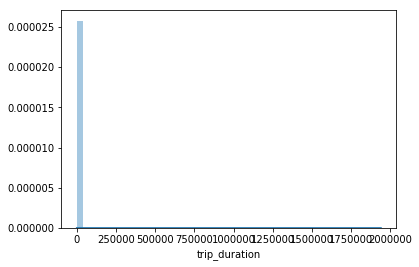

In [35]:
# check the distribution of the target variable
sns.distplot(nycTaxi_1['trip_duration'], kde = True)
plt.show()

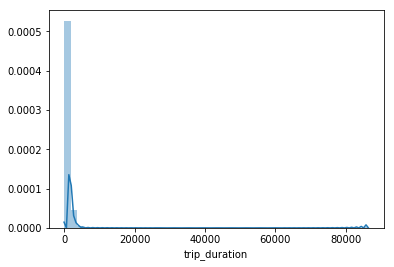

In [36]:
sns.distplot(nycTaxi_2['trip_duration'], kde = True)
plt.show()

Because of the outlier the distribution of both vendor is inconclusive.
* We have to log transform the target feature

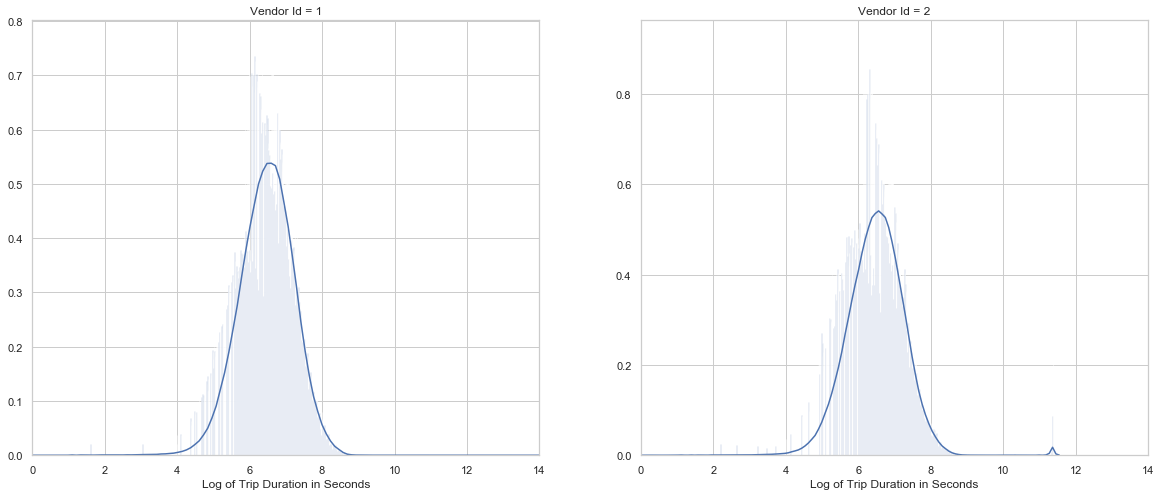

In [37]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
xmin = 0
xmax = 14
# Trip Duration log transaformation
temp = np.log(nycTaxi_1['trip_duration'])
ax1.set_xlim([xmin,xmax])
sns.distplot(temp, kde = True, bins = 5000, ax = ax1)
ax1.set(xlabel='Log of Trip Duration in Seconds', title='Vendor Id = 1')

temp = np.log(nycTaxi_2['trip_duration'])
ax2.set_xlim([xmin,xmax])
sns.distplot(temp, kde = True, bins = 5000, ax = ax2)
ax2.set(xlabel='Log of Trip Duration in Seconds', title='Vendor Id = 2')

plt.show()

Basically, for both the vendor has similar distribution for Trip duration but Vebdor 2 has a another spike at a higher trip duration, its distribution is bi-modal.

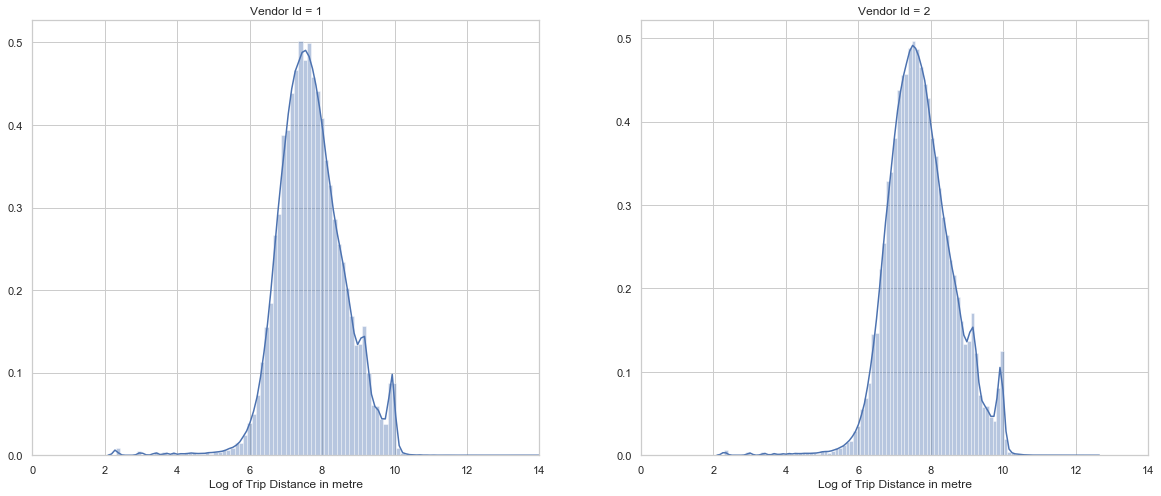

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
xmin = 0
xmax = 14
# Trip Duration log transaformation
temp = np.log(nycTaxi_1['trip_distance'] * 1000)
ax1.set_xlim([xmin,xmax])
sns.distplot(temp, kde = True, bins = 100, ax = ax1)
ax1.set(xlabel='Log of Trip Distance in metre', title='Vendor Id = 1')

temp = np.log(nycTaxi_2['trip_distance'] * 1000)
ax2.set_xlim([xmin,xmax])
sns.distplot(temp, kde = True, bins = 100, ax = ax2)
ax2.set(xlabel='Log of Trip Distance in metre', title='Vendor Id = 2')

plt.show()

The trip distance is more or less similar for both the vendors and the distribution is multi-modal

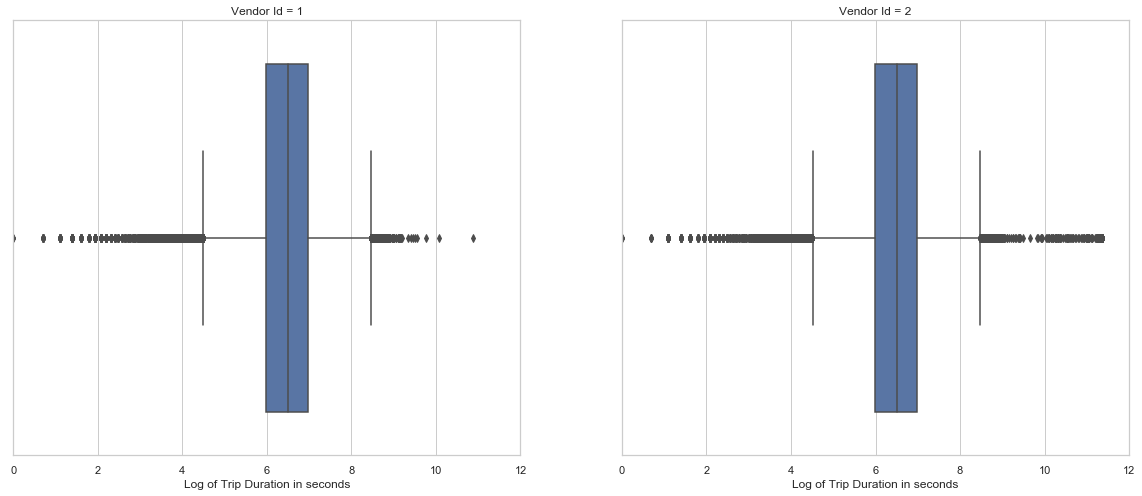

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
xmin = 0
xmax = 12
# Trip Duration log transaformation
temp = np.log(nycTaxi_1['trip_duration'])
ax1.set_xlim([xmin,xmax])
sns.boxplot(temp, ax = ax1)
ax1.set(xlabel='Log of Trip Duration in seconds', title='Vendor Id = 1')

temp = np.log(nycTaxi_2['trip_duration'])
ax2.set_xlim([xmin,xmax])
sns.boxplot(temp, ax = ax2)
ax2.set(xlabel='Log of Trip Duration in seconds', title='Vendor Id = 2')

plt.show()

Hence, we see that lots of outlier for both the vendor

In [40]:
nycTaxi_1.columns

Index(['avg_speed', 'trip_duration', 'trip_distance', 'pickup_date',
       'pickup_time', 'passenger_count'],
      dtype='object')

In [41]:
new_nycTaxi_1 = pd.DataFrame()

new_nycTaxi_1['Log of avg_speed'] = np.log(nycTaxi_1['avg_speed']*1000)
new_nycTaxi_1['Log of trip_distance'] = np.log(nycTaxi_1['trip_distance']*1000)
new_nycTaxi_1['Log of trip_duration'] = np.log(nycTaxi_1['trip_duration'])
new_nycTaxi_1['Passenger Count'] = nycTaxi_1['passenger_count']

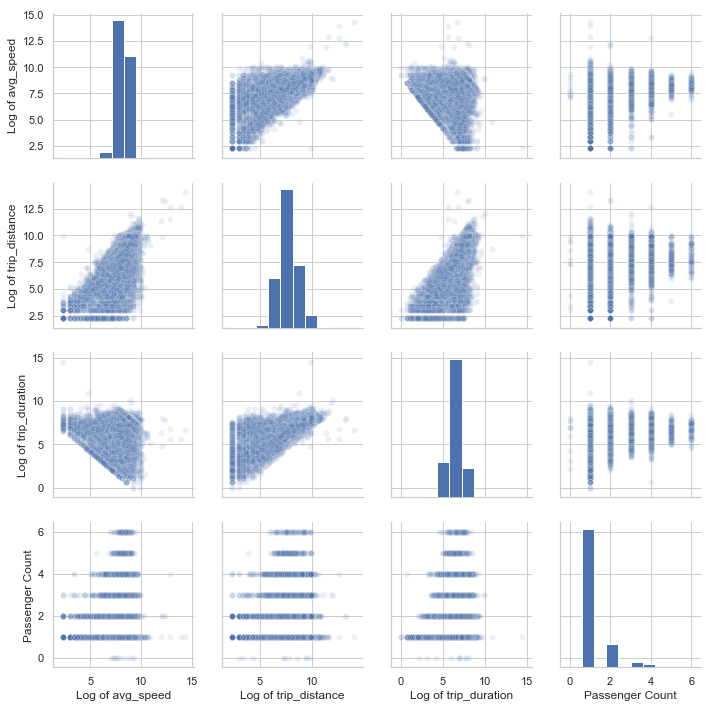

In [42]:
sns.pairplot(new_nycTaxi_1,vars = ['Log of avg_speed', 'Log of trip_distance', 'Log of trip_duration', 'Passenger Count'], plot_kws = {'alpha':0.1})
plt.show()

In [43]:
new_nycTaxi_2 = pd.DataFrame()

new_nycTaxi_2['Log of avg_speed'] = np.log(nycTaxi_2['avg_speed']*1000)
new_nycTaxi_2['Log of trip_distance'] = np.log(nycTaxi_2['trip_distance']*1000)
new_nycTaxi_2['Log of trip_duration'] = np.log(nycTaxi_2['trip_duration'])
new_nycTaxi_2['Passenger Count'] = nycTaxi_2['passenger_count']

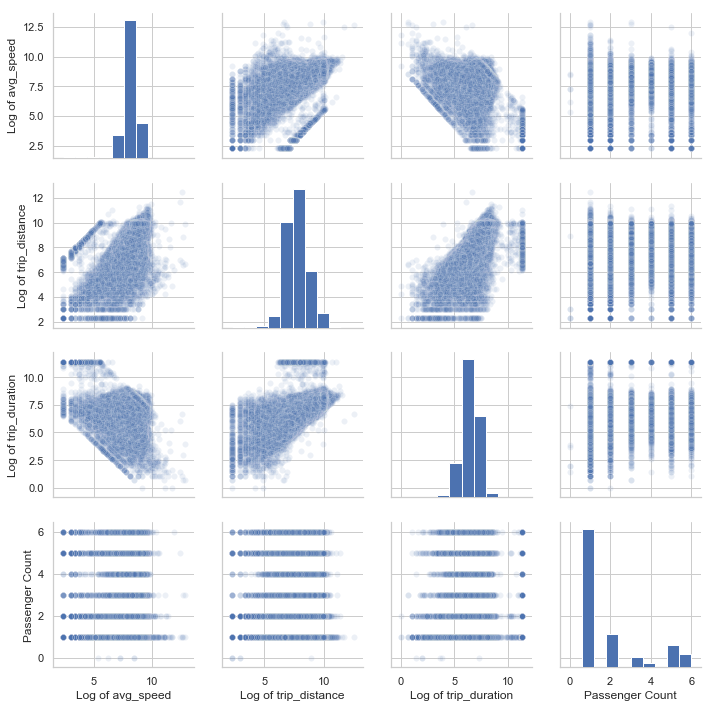

In [44]:
sns.pairplot(new_nycTaxi_2,vars = ['Log of avg_speed', 'Log of trip_distance', 'Log of trip_duration', 'Passenger Count'], plot_kws = {'alpha':0.1})
plt.show()

In [45]:
new_nycTaxi_1.head()

,Log of avg_speed,Log of trip_distance,Log of trip_duration,Passenger Count
1,8.229511,8.326033,7.003065,2
4,8.538955,8.373323,6.742881,1
6,7.962067,7.038784,5.983936,1
9,8.366370,8.722580,7.264730,1
10,8.101678,7.461640,6.267201,1


In [46]:
correl = new_nycTaxi_1.apply(lambda x: pd.factorize(x)[0]).corr()

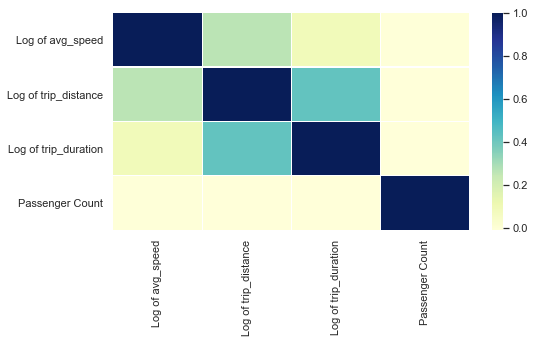

In [47]:
plt.figure(figsize=(8,4))
ax = sns.heatmap(correl, xticklabels=correl.columns,yticklabels=correl.columns,linewidths=0.2,cmap='YlGnBu')

So, Trip Duration have correlation with
* Trip Distance
* Average Speed

In [48]:
nycTaxi_1.drop(['passenger_count','avg_speed'], axis = 1, inplace=True)
nycTaxi_1['pickup_time'] = nycTaxi_1.apply(lambda x: int(x['pickup_time'][:2]),axis = 1)
nycTaxi_1.sort_values(by = ['pickup_date','pickup_time'], ascending=True, inplace=True)

In [49]:
nycTaxi_vendor1 = nycTaxi_1.groupby('pickup_time').sum()
nycTaxi_vendor1['Avg. Speed'] = nycTaxi_vendor1.apply(lambda x: round(x['trip_distance']*1000/x['trip_duration'],2), axis = 1)

In [50]:
nycTaxi_2.drop(['passenger_count','avg_speed'], axis = 1, inplace=True)
nycTaxi_2['pickup_time'] = nycTaxi_2.apply(lambda x: int(x['pickup_time'][:2]),axis = 1)
nycTaxi_2.sort_values(by = ['pickup_date','pickup_time'], ascending=True, inplace=True)

In [51]:
nycTaxi_vendor2 = nycTaxi_2.groupby('pickup_time').sum()
nycTaxi_vendor2['Avg. Speed'] = nycTaxi_vendor2.apply(lambda x: round(x['trip_distance']*1000/x['trip_duration'],2), axis = 1)

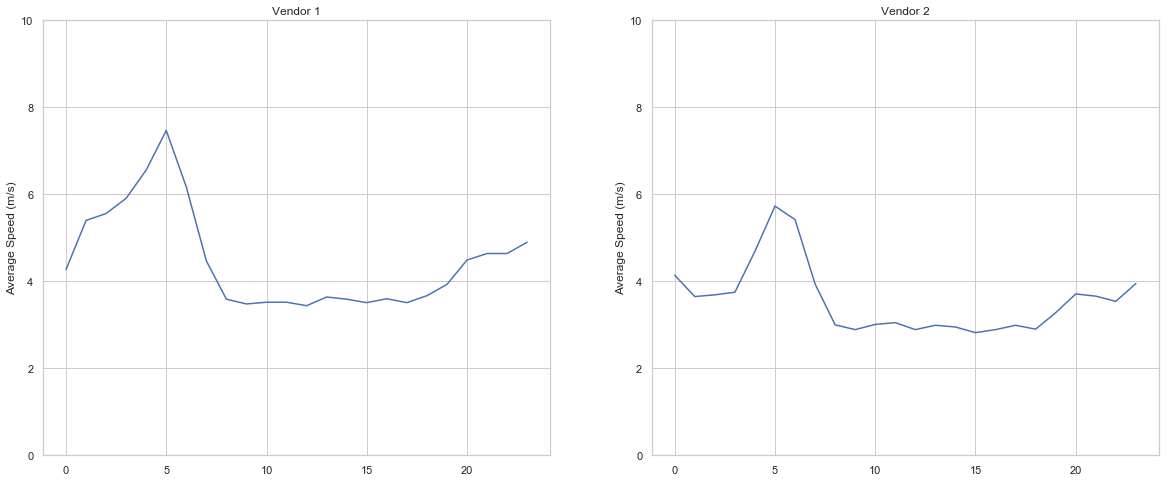

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
x = np.linspace(start = 0, stop = 23, num = 24)
ymin = 0
ymax = 10
sns.lineplot(x, nycTaxi_vendor1['Avg. Speed'],ax = ax1)
ax1.set_ylim([ymin, ymax])
ax1.set(ylabel= 'Average Speed (m/s)')
ax1.set_title('Vendor 1')

sns.lineplot(x, nycTaxi_vendor2['Avg. Speed'],ax = ax2)
ax2.set_ylim([ymin, ymax])
ax2.set(ylabel= 'Average Speed (m/s)')
ax2.set_title('Vendor 2')
plt.show()

Here, we tried to get the average speed of each vendors journey at every hour throughout the day over 6 months data.

If Average Speed for each hour is computed then Trip Duration can be computed by dividing the Trip Distance by Average Speed.

Some of the observations are
* Average Speed is highest between 5 am to 6 am
* It remains between 3 to 4 m/s approximately around 8 am to 4 pm for vendor 1
* It remains between 2 to 3 m/s approximately around 8 am to 4 pm for vendor 2